In [1]:

import tensorflow as tf
import json
import numpy as np
import pandas as pd
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [3]:
with open('/content/content.json') as content:
  data1=json.load(content)

In [4]:
tag=[]
patterns=[]
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    patterns.append(lines)
    tag.append(intent['tag'])

In [5]:
data=pd.DataFrame({"patterns":patterns,"tag":tag})
data

,patterns,tag
0,Hi there,greeting
1,Is anyone there?,greeting
2,Hey,greeting
3,Hola,greeting
4,Hello,greeting
5,Good day,greeting
6,Bye,goodbye
7,See you later,goodbye
8,Goodbye,goodbye
9,"Nice chatting to you, bye",goodbye


In [6]:
data=data.sample(frac=1)

In [7]:

import string
data['patterns']=data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns']=data['patterns'].apply(lambda wrd: ''.join(wrd))
data

,patterns,tag
1,is anyone there,greeting
19,how you can be helpful,options
9,nice chatting to you bye,goodbye
4,hello,greeting
38,joke please,joke
10,till next time,goodbye
24,order status,order-status-request
16,thanks for helping me,thanks
18,what help you provide,options
6,bye,goodbye


In [8]:
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train=tokenizer.texts_to_sequences(data['patterns'])

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tag'])

In [9]:
input_shape=x_train.shape[1]
print(input_shape)

9


In [10]:
vocabulary=len(tokenizer.word_index)
print("number of unique words: ",vocabulary)

output_length=le.classes_.shape[0]
print("output length: ",output_length)

number of unique words:  65
output length:  8


In [11]:
a=Input(shape=(input_shape,))
b=Embedding(vocabulary+1,10)(a)
b=LSTM(10,return_sequences=True)(b)
b=Flatten()(b)
b=Dense(output_length,activation='softmax')(b)
model=Model(a,b)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train=model.fit(x_train,y_train,epochs=400)

Epoch 1/400
2/2 [==============================] - 2s 11ms/step - loss: 2.0782 - accuracy: 0.1463
Epoch 2/400
2/2 [==============================] - 0s 12ms/step - loss: 2.0758 - accuracy: 0.1951
Epoch 3/400
2/2 [==============================] - 0s 8ms/step - loss: 2.0737 - accuracy: 0.1707
Epoch 4/400
2/2 [==============================] - 0s 8ms/step - loss: 2.0715 - accuracy: 0.2195
Epoch 5/400
2/2 [==============================] - 0s 8ms/step - loss: 2.0696 - accuracy: 0.1951
Epoch 6/400
2/2 [==============================] - 0s 9ms/step - loss: 2.0676 - accuracy: 0.2439
Epoch 7/400
2/2 [==============================] - 0s 9ms/step - loss: 2.0659 - accuracy: 0.2439
Epoch 8/400
2/2 [==============================] - 0s 9ms/step - loss: 2.0638 - accuracy: 0.2439
Epoch 9/400
2/2 [==============================] - 0s 11ms/step - loss: 2.0617 - accuracy: 0.2439
Epoch 10/400
2/2 [==============================] - 0s 9ms/step - loss: 2.0596 - accuracy: 0.2683
Epoch 11/400
2/2 [========

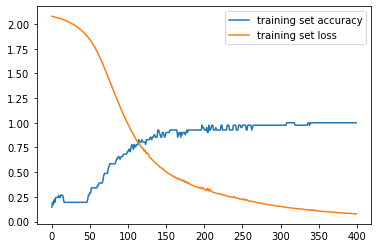

In [13]:

plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [15]:
import random
while True:
  texts=[]
  prediction_input=input('you: ')

  prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input=''.join(prediction_input)
  texts.append(prediction_input)

  prediction_input=tokenizer.texts_to_sequences(texts)
  prediction_input=np.array(prediction_input).reshape(-1)
  prediction_input=pad_sequences([prediction_input],input_shape)

  output=model.predict(prediction_input)
  output=output.argmax()

  response_tag=le.inverse_transform([output])[0]
  print("BOT: ",random.choice(responses[response_tag]))
  if response_tag=="goodbye":
    break

you: hi
BOT:  My pleasure
you: How you could help me?
BOT:  I can check your order status, and cancel your order.
you: Please check my order status
BOT:  I am checking your status of your order, Please wait.
you: I want to cancel my order
BOT:  I can cancel your order, If your order is in kitchen, there will be a cancellation fee.  Do you want me to proceed?
you: yes
BOT:  Any time!
you: bye
BOT:  Bye! Come back again soon.
